# OKCupid
## Analysing data from a dating application and building a ML model


This project is based on a dataset provided by Codecademy.com. It which contains users' profile data from OKCupid - online dating applications. 
In the app, users create their profiles and fill in their personal data. Some of the categories (e.g. diet, religion) are not obligatory and can be skipped. One of the categories which seems to be skipped quite often is the user's astrological sign. 
Users from some cultures find astrological signs an important aspect of finding a match. 
The purpose of the analysis is to answer the following research question: Can OkCupid effectively predict the user's astrological sign  based on other data from their profiles? 

The project is consists of the following two main parts:
1. Exploration of the dataset in search for parameters for the machine learning models. 
2. Data preparation, creation of the models and testing.

The data from on-line dating application OKCupid was provided by Codecademy.com.

## Importing Python modules and loading the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

profiles_df = pd.read_csv('profiles.csv')

## Exploring and preprocessing the data

In [2]:
profiles_df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
profiles_df.shape

(59946, 31)

The dataset contains 59946 rows and 31 columns. 
The columns are listed below.

In [4]:
profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

The majority of the 31 variables are categorical variables. Only the following columns contain different data types:

- **age** - a discrete numerical variable representing user's age,
- **height** - a continuous numerical variable representing user's height,
- **income** - a continuous numerical variable representing user's income,
- **last_online** - a datetime variable representing the last time the user was available online.

The dataset also contains 10 'essay' columns. According to the data source, they contain user's answers to the following questions:

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

Although exploring the 'essays' contain a lot of interesting information about the app's users, in this project I will focus on numerical and categorical data. 

Below, I have a quick look at each of the variables in search for features that I could use in the machine learning model predicting user's sign.

### Numerical variables: Age, height and income


The numerical variables will be visualized with histograms to find out more about the data distribution.

#### Age

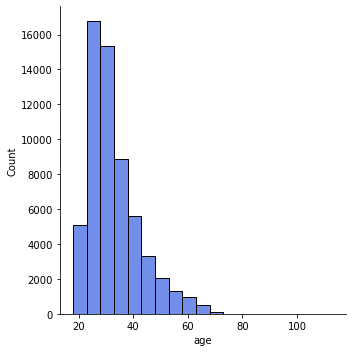

In [5]:
sns.displot(data=profiles_df, x='age', binwidth = 5, color = 'royalblue');

The age plot shows that the majority of users are in their late 20s and early 30s. 
This data can be examined further by breaking down by gender.

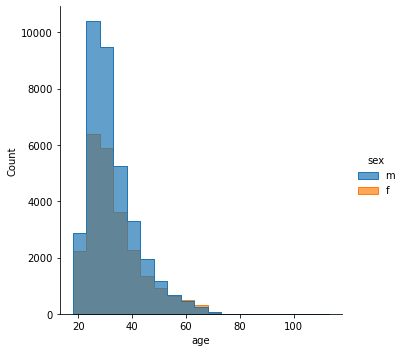

In [6]:
sns.displot(data=profiles_df, x='age', hue='sex', binwidth = 5, alpha=0.7, element='step');

The graph shows that the majority of users in nearly all age groups are men - with an exception for the oldest users of the app.

#### Height

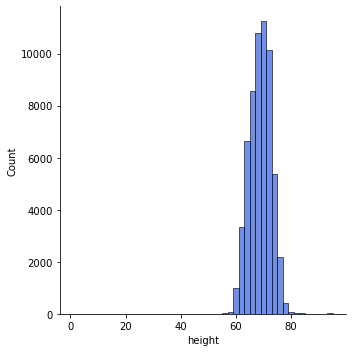

In [7]:
sns.displot(data=profiles_df, x='height', binwidth=2, color = 'royalblue');

The histogram shows a normal distribution of height values: the majority of data fits into the 5-6.5 feet range. 

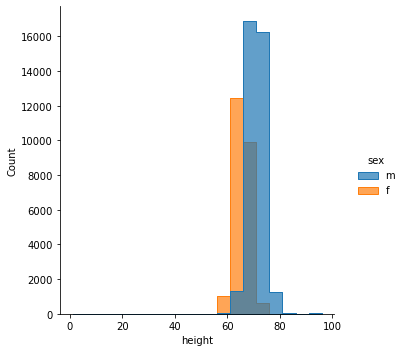

In [8]:
# Height broken down by gender

sns.displot(data=profiles_df, x='height', hue='sex', binwidth = 5, alpha=0.7, element='step');

Just as expected, female users tend to be shorter than male users. 

#### Income

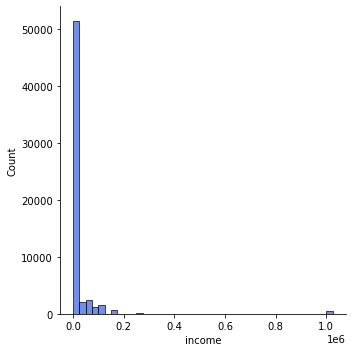

In [9]:
sns.displot(profiles_df['income'], binwidth = 25000, color = 'royalblue');

The distribution of the  values presented in the histogram is unusual - we can see that the majority of cases fall into the extreme bins - with values around 0 being represented the most. It also seems likely that a lot of app users did not want to reveal their income. For this reason, the values in the 'income' column are explored further below. 

In [10]:
profiles_df.income.isna().sum()

0

In [11]:
profiles_df.income.unique()

array([     -1,   80000,   20000,   40000,   30000,   50000,   60000,
       1000000,  150000,  100000,  500000,   70000,  250000], dtype=int64)

In [12]:
profiles_df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [13]:
profiles_df.income.value_counts().to_list()[0]/len(profiles_df) * 100

80.80939512227671

As predicted, more than 80% of users didn't reveal their income. 
The invalid income value '-1' is replaced with a null value below.

In [14]:
profiles_df.income.replace(-1, np.nan, inplace = True)
profiles_df.income.head()

0        NaN
1    80000.0
2        NaN
3    20000.0
4        NaN
Name: income, dtype: float64

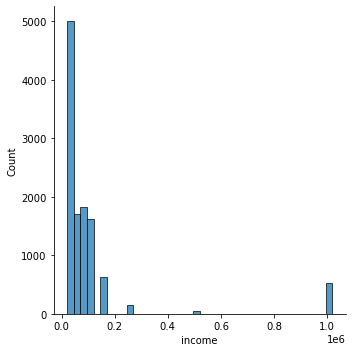

In [15]:
# Updated income plot^^
sns.displot(data=profiles_df, x="income", binwidth = 25000);

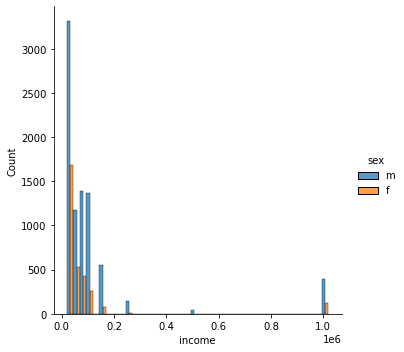

In [16]:
# Income broken down by gender

sns.displot(data=profiles_df, x='income', hue='sex', binwidth = 25000, multiple='dodge');

The updated histograms show now more clearly that the income of the majority of users (users who revealed their income) lies below the USD 200,000.00 mark. However, there are also approx. 500 self-reported millionaires among the users who stated their income. 

### Exploring categorical variables

The dataset contains more categorical than numerical variables. To speed up the exploration of each variable, two functions defined below will be used:
- function **explore_var** will display a few details about the data such as counts and number of the unique vaues as well as the number of missing values and their percentage,
- function **plot_countplot** will be used to display a countplot for selected categories (in some cases, a different plot, e.g. a pie chart, will be chosen to visualize the data).

In [17]:
def explore_var(column_name):

    print('Summary data for', column_name, '\n')
           
    # show counts
    print('Value counts:') 
    print(profiles_df[column_name].value_counts(), '\n')
    print('Number of unique values: ', profiles_df[column_name].nunique(), '\n')
    print('Number of missing values: ', profiles_df[column_name].isna().sum())
    print('Missing values - percent: ',  profiles_df[column_name].isna().sum() / len(profiles_df) * 100)
        

In [18]:
def plot_countplot(column_name):
    ax = sns.countplot(data = profiles_df, x = column_name, palette='Set3')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
    plt.show()
    plt.clf()

#### Body type

In [19]:
explore_var('body_type')

Summary data for body_type 

Value counts:
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64 

Number of unique values:  12 

Number of missing values:  5296
Missing values - percent:  8.834617822707102


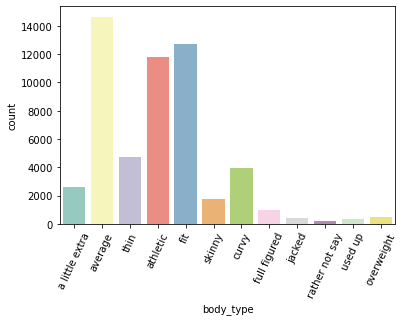

<Figure size 432x288 with 0 Axes>

In [20]:
plot_countplot('body_type')

In [21]:
explore_var('diet')

Summary data for diet 

Value counts:
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64 

Number of unique values:  18 

Number of missing values:  24395
Missing values - percent:  40.694958796249956


It is important to note that as many as 40% of users skipped the question about their diet. If this feature is selected for machine learning, dropping null values will significantly reduce the input values - there will be less data available to train and test the model. 
It also seems to make sense to simplify the data in this column and reduce the number of values by combining the related ones such as 'strictly vegan', 'mostly vegan' and 'vegan'.

In [22]:
profiles_df['diet_simpl'] = profiles_df.diet.str.split().str.get(-1)

print('Number of diet types after simplification:', profiles_df.diet_simpl.nunique())
print('Unique values in the column \'diet_simpl\': \n', profiles_df.diet_simpl.unique().tolist())

Number of diet types after simplification: 6
Unique values in the column 'diet_simpl': 
 ['anything', 'other', 'vegetarian', nan, 'vegan', 'halal', 'kosher']


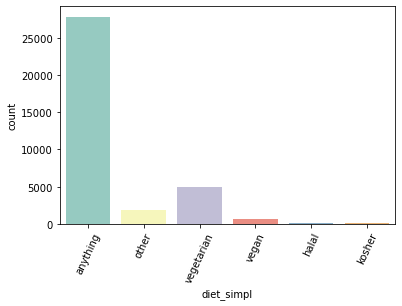

<Figure size 432x288 with 0 Axes>

In [23]:
plot_countplot('diet_simpl')

In [24]:
explore_var('drinks')

Summary data for drinks 

Value counts:
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64 

Number of unique values:  6 

Number of missing values:  2985
Missing values - percent:  4.979481533380041


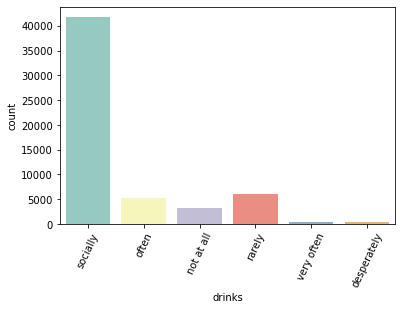

<Figure size 432x288 with 0 Axes>

In [25]:
plot_countplot('drinks')

In [26]:
explore_var('drugs')

Summary data for drugs 

Value counts:
never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64 

Number of unique values:  3 

Number of missing values:  14080
Missing values - percent:  23.487805691789276


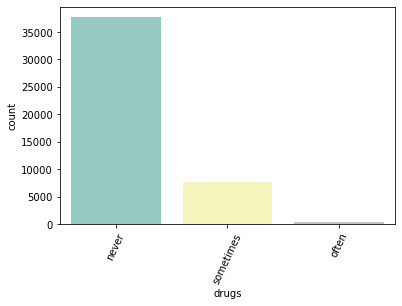

<Figure size 432x288 with 0 Axes>

In [27]:
plot_countplot('drugs')

In [28]:
explore_var('education')

Summary data for education 

Value counts:
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out

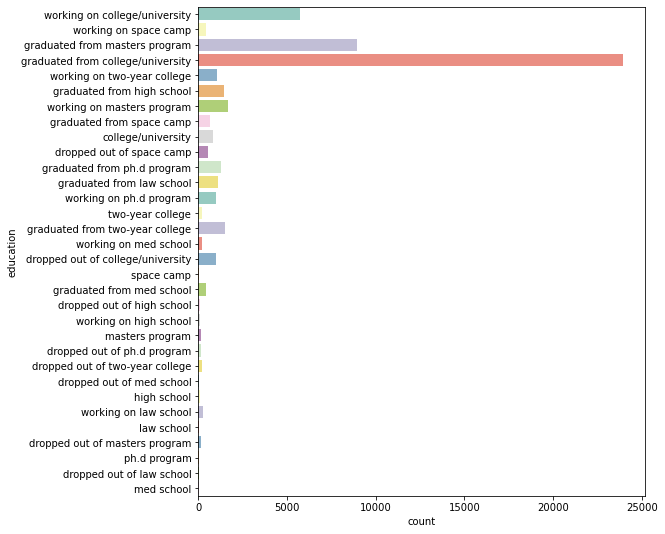

In [29]:
plt.figure(figsize=(8,9))
sns.countplot(data = profiles_df, y = 'education', palette='Set3');

In [30]:
explore_var('ethnicity')

Summary data for ethnicity 

Value counts:
white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: ethnicity, Length: 217, dtype: int64 

Number of unique values:  217 

Number of missing values:  5680
Missing valu

In [31]:
explore_var('job')

Summary data for job 

Value counts:
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64 

Number of unique values:  21 

Number of missing values

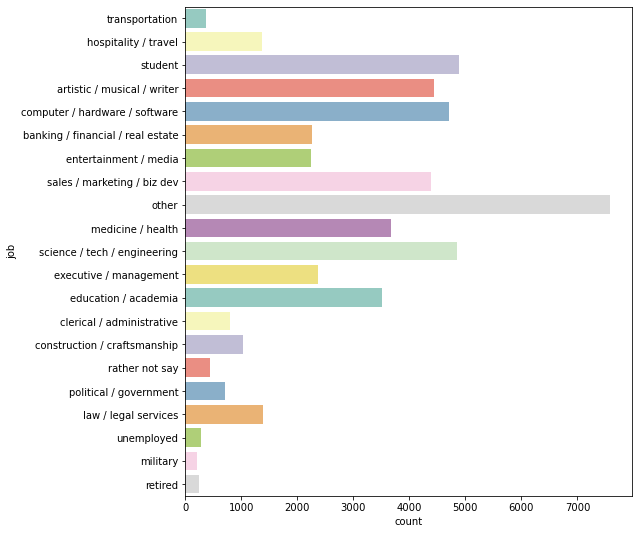

In [32]:
plt.figure(figsize=(8,9))
sns.countplot(data = profiles_df, y = 'job', palette='Set3');

In [33]:
explore_var('location')

Summary data for location 

Value counts:
san francisco, california         31064
oakland, california                7214
berkeley, california               4212
san mateo, california              1331
palo alto, california              1064
                                  ...  
south wellfleet, massachusetts        1
orange, california                    1
astoria, new york                     1
london, united kingdom                1
rochester, michigan                   1
Name: location, Length: 199, dtype: int64 

Number of unique values:  199 

Number of missing values:  0
Missing values - percent:  0.0


In [34]:
explore_var('offspring')

Summary data for offspring 

Value counts:
doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: offspring, dtype: int64 

Number of unique values: 

In [35]:
explore_var('orientation')

Summary data for orientation 

Value counts:
straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64 

Number of unique values:  3 

Number of missing values:  0
Missing values - percent:  0.0


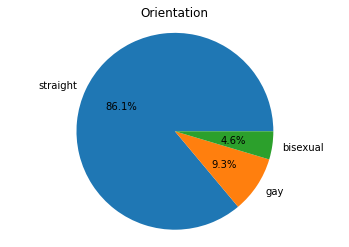

<Figure size 432x288 with 0 Axes>

In [36]:
values_list = list(profiles_df.orientation.value_counts())
labels = profiles_df.orientation.value_counts().index.tolist()

plt.pie(values_list, labels = labels, autopct='%0.1f%%')
plt.axis('equal')
plt.title('Orientation')
plt.show()
plt.clf()

In [37]:
explore_var('pets')

Summary data for pets 

Value counts:
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64 

Number of unique values:  15 

Number of missing values:  19921
Missing values - percent:  33.231575084242486


Approximately every third user skipped the question about their favourite pets. Selecting this feature for the model and dropping the null values will reduce the data available for training and testing. 

In [38]:
explore_var('religion')

Summary data for religion 

Value counts:
agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it           

Similarly to the pet category, approximately one third of the users did not reveal their religion. 
It seems to be possible to reduce the large number of unique values (45) by combining the related values. 

In [39]:
profiles_df['religion_simpl'] = profiles_df.religion.str.split().str.get(0)

print('Number of religions after cleaning:', profiles_df.religion_simpl.nunique())
print('Unique values in the column \'religion_simpl\': \n', profiles_df.religion_simpl.unique().tolist())

Number of religions after cleaning: 9
Unique values in the column 'religion_simpl': 
 ['agnosticism', nan, 'atheism', 'christianity', 'other', 'catholicism', 'buddhism', 'judaism', 'hinduism', 'islam']


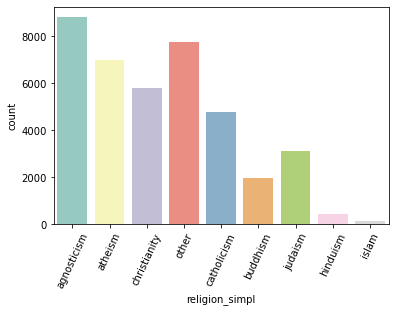

<Figure size 432x288 with 0 Axes>

In [40]:
plot_countplot('religion_simpl')

In [41]:
explore_var('sex')

Summary data for sex 

Value counts:
m    35829
f    24117
Name: sex, dtype: int64 

Number of unique values:  2 

Number of missing values:  0
Missing values - percent:  0.0


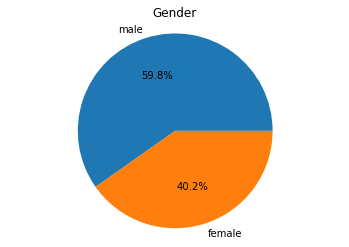

<Figure size 432x288 with 0 Axes>

In [42]:
values_list = list(profiles_df.sex.value_counts())
labels = ['male', 'female']
plt.pie(values_list, labels = labels, autopct='%0.1f%%')
plt.axis('equal')
plt.title('Gender')
plt.show()
plt.clf()

As shown earlier, men constitute the majority of app users. 

In [43]:
explore_var('sign')

Summary data for sign 

Value counts:
gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter        

As discussed earlier, the astrological sign is one of the categories that is skipped by a number of users when completing their profile: 18% of users do not include this information. 
For the purpose of the model, the number of unique values (48) will be reduced to 12 (which is the actual number of signs). 

In [44]:
profiles_df['sign_simpl'] = profiles_df.sign.str.split().str.get(0)

print('Number of signs after cleaning:', profiles_df.sign_simpl.nunique())
print('Unique values in the column \'sign_simpl\': \n', profiles_df.sign_simpl.unique().tolist())

Number of signs after cleaning: 12
Unique values in the column 'sign_simpl': 
 ['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'virgo', 'sagittarius', 'leo', nan, 'aries', 'libra', 'scorpio', 'capricorn']


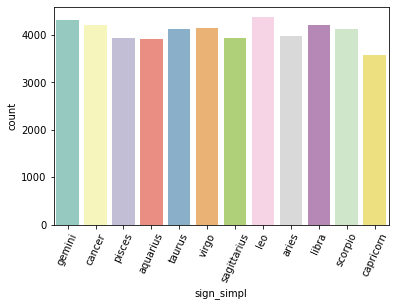

<Figure size 432x288 with 0 Axes>

In [45]:
plot_countplot('sign_simpl')

The plot shows that the signs are distributed more or less evenly, which means there is no problem of label imbalance.
The most frequent sign is leo and the least represented one is capricorn. 

In [46]:
explore_var('smokes')

Summary data for smokes 

Value counts:
no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64 

Number of unique values:  5 

Number of missing values:  5512
Missing values - percent:  9.194942114569779


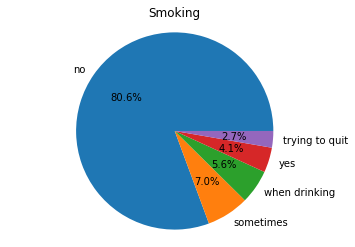

<Figure size 432x288 with 0 Axes>

In [47]:
values_list = list(profiles_df.smokes.value_counts())
labels = profiles_df.smokes.value_counts().index.tolist()
plt.pie(values_list, labels = labels, autopct='%0.1f%%')
plt.axis('equal')
plt.title('Smoking')
plt.show()
plt.clf()

In [48]:
explore_var('speaks')

Summary data for speaks 

Value counts:
english                                                                21828
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: speaks, Length: 7647, dtype: int64 

Number of unique values:  7647 

Number of missing values:  50
Missing

In [49]:
explore_var('status')

Summary data for status 

Value counts:
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64 

Number of unique values:  5 

Number of missing values:  0
Missing values - percent:  0.0


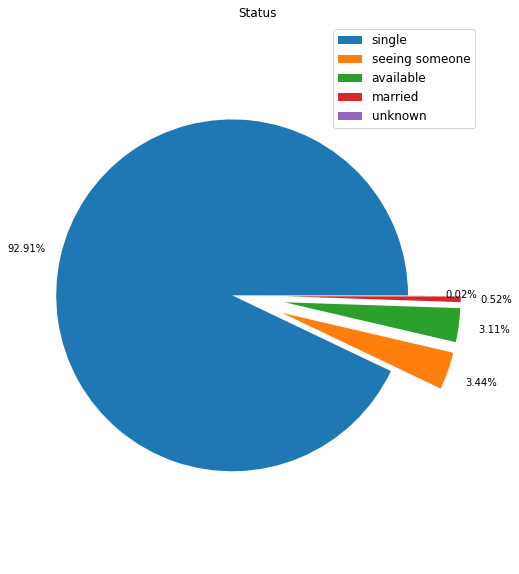

<Figure size 432x288 with 0 Axes>

In [50]:
values_list = list(profiles_df.status.value_counts())
labels = profiles_df.status.value_counts().index.tolist()
explode = [0, 0.3, 0.3, 0.3, 0.1]

plt.figure(figsize=(8, 10))
plt.pie(values_list, explode = explode, autopct='%0.2f%%', pctdistance = 1.2)
plt.axis('equal')
plt.legend(labels, fontsize = 12, loc='best')

plt.title('Status')

plt.show()
plt.clf()

As predicted, the majority of the dating app users are single. 

## Building and evaluating models

### Preparing the data

Below, a number of features is selected which combined may be predictors of astronomical signs. The selection can be updated at a later stage to fine tune the model and increase its reliability. 

In [51]:
model_columns = ['sign_simpl', 'body_type', 'diet_simpl', 'drinks', 'smokes', 'job', 'orientation', 'pets']
model_df = profiles_df[model_columns]
model_df.shape

(59946, 8)

The exploration stage showed that many columns in the dataset have null values. 
The missing values for the columns selected for the model are displayed below. 

In [52]:
model_df.isna().sum()

sign_simpl     11056
body_type       5296
diet_simpl     24395
drinks          2985
smokes          5512
job             8198
orientation        0
pets           19921
dtype: int64

In [53]:
model_df = model_df.dropna()
model_df.head()

,sign_simpl,body_type,diet_simpl,drinks,smokes,job,orientation,pets
0,gemini,a little extra,anything,socially,sometimes,transportation,straight,likes dogs and likes cats
1,cancer,average,other,often,no,hospitality / travel,straight,likes dogs and likes cats
3,pisces,thin,vegetarian,socially,no,student,straight,likes cats
5,taurus,average,anything,socially,no,computer / hardware / software,straight,likes cats
7,sagittarius,average,anything,socially,no,artistic / musical / writer,straight,likes dogs and likes cats


In [54]:
model_df.shape

(19620, 8)

In [55]:
print(f'The final model dataset contains {model_df.shape[0]} rows and {model_df.shape[-1]} columns.')

The final model dataset contains 19620 rows and 8 columns.


Despite a loss of data, the rows with missing values have been removed from the model dataset. The resulting number of rows still seems to be enough to train the model and test its predictions. 

#### Creating dummies for categorical variables

In [56]:
for column in model_columns[1:]:
    model_df = pd.get_dummies(model_df, columns = [column], prefix = [column])

In [57]:
model_df.shape

(19620, 69)

In [58]:
model_df.head()

,sign_simpl,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,pets_has cats,pets_has dogs,pets_has dogs and dislikes cats,pets_has dogs and has cats,pets_has dogs and likes cats,pets_likes cats,pets_likes dogs,pets_likes dogs and dislikes cats,pets_likes dogs and has cats,pets_likes dogs and likes cats
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,pisces,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Splitting the data into training and testing data

In [59]:
from sklearn.model_selection import train_test_split 

column_length = len(model_df.columns)

x = model_df.iloc[:, 1:column_length]
y = model_df.iloc[:, 0:1]


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2, random_state = 1)

# Turning target outputs into 1D NumPy arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()


In [60]:
# Checking the resulting data shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15696, 68)
(3924, 68)
(15696,)
(3924,)


The test data will be fit to two selected common algorithms: K-Nearest Neighbour and Decision Tree Classifier. Both models will be tested and their accuracy (and other 'reliability' scores) will be compared.

### K-Nearest Neighbour Model

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report

knc_model = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)
y_knc_predict = knc_model.predict(x_train)

print(classification_report(y_train, y_knc_predict))

              precision    recall  f1-score   support

    aquarius       0.22      0.56      0.31      1200
       aries       0.21      0.43      0.28      1264
      cancer       0.24      0.35      0.28      1364
   capricorn       0.27      0.29      0.28      1149
      gemini       0.29      0.26      0.27      1406
         leo       0.36      0.25      0.29      1433
       libra       0.32      0.20      0.24      1289
      pisces       0.34      0.20      0.25      1272
 sagittarius       0.32      0.19      0.23      1247
     scorpio       0.30      0.19      0.24      1316
      taurus       0.34      0.19      0.25      1333
       virgo       0.36      0.19      0.25      1423

    accuracy                           0.27     15696
   macro avg       0.30      0.27      0.27     15696
weighted avg       0.30      0.27      0.27     15696



### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 

dtc_model = DecisionTreeClassifier().fit(x_train, y_train) 
y_dtc_predict = dtc_model.predict(x_train) 

print(classification_report(y_train, y_dtc_predict))

              precision    recall  f1-score   support

    aquarius       0.46      0.72      0.56      1200
       aries       0.46      0.68      0.55      1264
      cancer       0.47      0.65      0.55      1364
   capricorn       0.57      0.60      0.58      1149
      gemini       0.57      0.57      0.57      1406
         leo       0.57      0.56      0.56      1433
       libra       0.66      0.50      0.57      1289
      pisces       0.53      0.53      0.53      1272
 sagittarius       0.64      0.49      0.55      1247
     scorpio       0.66      0.42      0.51      1316
      taurus       0.72      0.47      0.57      1333
       virgo       0.62      0.47      0.53      1423

    accuracy                           0.55     15696
   macro avg       0.58      0.56      0.55     15696
weighted avg       0.58      0.55      0.55     15696



In [63]:
dtc_matrix = confusion_matrix(y_train, y_dtc_predict)
dtc_labels = dtc_model.classes_

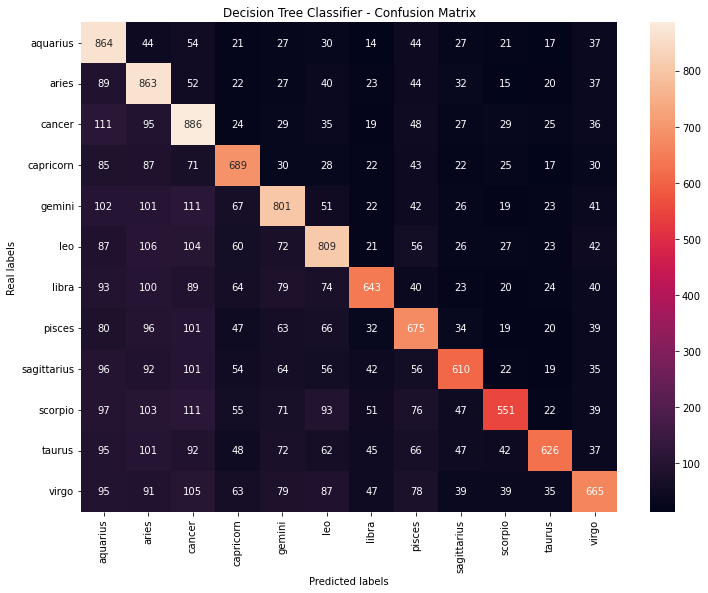

In [64]:
plt.figure(figsize=(12,9))

ax = plt.subplot()
sns.heatmap(dtc_matrix, annot=True, ax = ax, fmt = 'd');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('Real labels'); 
ax.set_title('Decision Tree Classifier - Confusion Matrix');
ax.yaxis.set_tick_params(rotation = 360)
ax.xaxis.set_tick_params(rotation = 90)

ax.xaxis.set_ticklabels(dtc_labels); 
ax.yaxis.set_ticklabels(dtc_labels);

The default maximum depth of the decision tree is set to 'none' meaning that the tree nodes will continue expanding until all leaves are pure. To check if the model could generalize to a different dataset, the depth of the model will be checked.

In [65]:
dtc_model.get_depth()

52

The depth of 52 branches indicates that the problem of overfitting - the model relies too heavily on the training data.
For this reason, another version of the model will be created - this time with the maximum depth reduced to 25.

In [66]:
dtc_model_25 = DecisionTreeClassifier(max_depth = 25).fit(x_train, y_train) 
y_dtc_predict_25 = dtc_model_25.predict(x_train) 

print(classification_report(y_train, y_dtc_predict_25))

              precision    recall  f1-score   support

    aquarius       0.51      0.34      0.41      1200
       aries       0.35      0.41      0.38      1264
      cancer       0.33      0.40      0.36      1364
   capricorn       0.49      0.33      0.40      1149
      gemini       0.24      0.44      0.31      1406
         leo       0.39      0.36      0.37      1433
       libra       0.48      0.30      0.37      1289
      pisces       0.39      0.32      0.35      1272
 sagittarius       0.54      0.27      0.36      1247
     scorpio       0.56      0.24      0.33      1316
      taurus       0.47      0.30      0.37      1333
       virgo       0.20      0.46      0.28      1423

    accuracy                           0.35     15696
   macro avg       0.41      0.35      0.36     15696
weighted avg       0.41      0.35      0.36     15696



After reducing the maximum depth the accuracy of the model has dropped below 50% and is exactly 35%, which is still a slightly better result than in the case of the KNN model. 

## Conclusion and Future Work

In this project, two ML machine learning models were created to try to predict astrological signs of a dating app users who didn't provide that information. Two common algorithms were implemented: KNearestNeighbours and Decision Tree Classifier and then compared in terms of their accuracy, precision, recall and f1 score.

As we can see from the classification reports, the accuracy and the 'efectiveness' score are quite low. The highest scores were achieved with the Decision Tree Classifier without restricting the maximum depth. This model, however, overfits the data, which means it could not generalize on the other dataset.

The next steps would be to work on the selection of parameters and checking if the models could score higher in terms of accuracy and other measures of effectiveness. This can be confirmed by the fact that an attempt at creating a logistic regression model with the current parameters resulted in no convergence. Also, other ML algorithms could be used to check if it is possible to predict the astrological signs of users more effectively.